# 딥러닝 온라인 심화반 <Level 7>에 오신 것을 환영합니다!

지금까지 퍼셉트론, 다층 퍼셉트론 등 많은 알고리즘을 다뤘지만, 현업에서, 그리고 실제 연구에서 이 알고리즘을 사용하기 위해서는 알고리즘의 성능을 정량적으로 측정하고 그 성능을 분석하는게 중요합니다. 이번 시간에는 구현한 딥러닝 모델의 성능을 평가하는 다양한 방법에 대해 살펴볼 것입니다. 마지막 과제로는 우편번호 손글씨 이미지(MNIST)로 학습한 다층 퍼셉트론의 성능을 평가하고, 이 모델을 활용하여 데이터 사이언스 경진대회 [캐글(Kaggle)](https://kaggle.com)에 도전하는 시간을 가져볼 것입니다.

## Overfitting(과대적합)과 Underfitting(과소적합)

선형 회귀 분석과 같은 통계적 모델을 사용할 때, 새로운 데이터에 대해 예측하기 위한 훈련 세트에 모형을 적합시킵니다. 이때 Overfitting과 Underfitting의 두 가지 문제가 발생할 수 있습니다. Overfitting과 Underfitting이 무엇인지 알아봅시다.

<img src="http://drive.google.com/uc?export=view&id=1f9BP-G9nW2yaaCvb4eAtXWdmNOCw0607" width="800">


### Overfitting(과대적합)

Overfitting은 모델이 Training Data에 너무 잘 맞아서 일반성이 떨어지게 되는 문제입니다. 즉 Training Data를 너무 과하게 학습해 학습되지 않은 데이터가 들어오면 분류하지 못하게 되는 문제를 일으킵니다. 위의 오른쪽 그림에서 볼 수 있듯이 Training Data를 거의 다 거치거나 분류해내며 굉장히 높은 성능을 보여주고 있지만, 새로운 변수에 대응하기 어렵습니다. Overfitting은 보통 모델이 너무 복잡할 때 발생합니다. 특히 딥러닝은 학습 단계에서 입력, 은닉층, 출력층의 노드들에 상당히 많은 변수들이 투입되기 때문에 Overfitting이 발생할 위험이 큽니다. Overfitting이 발생하면 이 모델은 Training Data에 대해서는 매우 정확하지만 훈련되지 않은 새로운 데이터에 대해서는 정확성이 떨어집니다. 

### Underfitting(과소적합)

Overfitting과 반대로, Underfitting은 모델이 Training Data에 잘 맞지 않아서 데이터의 내재된 구조를 학습하지 못할 때 발생하는 문제입니다. Underfitting도 Overfitting과 마찬가지로 새로운 데이터에 일반화될 수 없습니다. 보통 모델이 너무 단순할 때 발생합니다. 예를 들어, 위의 왼쪽 그림처럼 선형이 아닌 데이터에 대해 선형 모델을 학습시킬 때 Underfitting이 발생할 수 있습니다. <br>

그렇다면 Overfitting과 Underfitting을 방지하려면 어떻게 해야 할까요? 

## Bias(편향)와 Variance(분산)

모델 예측을 논의할 때, Bias와 Variance를 이해하는 것이 중요합니다. Bias와 Variance는 Trade-off 관계에 있기 때문에 이 둘을 모두 최소화시키는 것은 불가능합니다. 이 두 가지 에러를 적절히 이해하면 정확한 모델을 만들 수 있을 뿐만 아니라 Overfitting과 Underfitting을 피할 수 있습니다. <br>

머신러닝/딥러닝 모델에서 이 두 가지 에러의 개념과 차이를 살펴봅시다. <br>
<img src="http://drive.google.com/uc?export=view&id=1xrQc3y3HPtm3bJlBiG8OGWBCjuOv1BOg" width="600"> <br>

우리가 예측하고자 하는 변수를 Y라고 하고 학습에 사용되는 데이터인 독립변수(Feature)을 X라고 합시다. 두 변수 사이에는 다음과 같은 관계가 존재한다고 가정합니다. <br>
$$ Y=f(X) + e $$ <br>
여기서 e는 에러 항을 의미하며, e는 평균이 0인 정규분포를 따릅니다. <br>
따라서 x에서의 Total Error는 다음과 같습니다. 여기서 $\hat{f}(x)$ 은 예측값을 의미합니다.<br>
$$ Total Error(x) = E[(Y-\hat{f}(x))^2] $$ <br>
Total Error(x)는 다음과 같이 분해될 수 있습니다. <br>
$$ Total Error(x) = (E[\hat{f}(x)]-f(x))^2 + E[(\hat{f}(x)-E[\hat{f}(x)])^2] + \sigma_{e}^2$$ 
$$ Total Error(x) = Bias^2 + Variance + Irreducible Error $$ <br>
Irreducible Error는 좋은 모델을 생성함으로써 줄일 수 없는 에러입니다. 이는 데이터가 가진 noise에 대한 척도입니다. 모델의 적합성에 관계없이 데이터는 특정량의 noise(또는 Irreducible Error)를 가지고 있습니다.

### Bias(편향)

Bias는 모델의 예측값과 실제값의 차이를 의미합니다. 즉, 위의 그림에서 볼 수 있듯이 예측값이 실제값에 얼마나 가까운지를 나타냅니다. 높은 Bias를 가진 모델은 Training Data에 거의 관심을 기울이지 않고 모델을 지나치게 단순화합니다. 이는 항상 훈련 데이터와 테스트 데이터에서 높은 에러를 초래합니다.

### Variance(분산)

Variance는 주어진 데이터에 대한 모델의 예측값들이 서로 얼마나 퍼져 있는지에 대한 척도입니다. 높은 Variance를 가진 모델은 Training Data에 너무 관심을 기울여서 전에 보지 못한 데이터들에 일반화할 수 없습니다. 결과적으로, 그러한 모델은 Training Data에 대해서는 성능이 좋지만, Testing Data에 대해서는 높은 에러를 보여줍니다.

### Bias와 Variance의 Tradeoff

Bias-Variance Tradeoff라는 개념은 간단하게 말하면 Bias와 Variance는 어쩔 수 없이 서로 trade-off 관계를 가지고 있다는 의미입니다. 모델을 선택할 때, Training Data의 패턴을 정확하게 파악하는 것뿐만 아니라 새로운 데이터에까지 일반화될 수 있도록 하는 것이 가장 이상적인 바람입니다. 하지만 이 둘을 동시에 만족시키는 것은 사실상 불가능합니다. 모델이 너무 단순하거나 패러미터가 너무 적으면 높은 Bias와 낮은 Variance를 가질 것입니다. 반면 우리 모델이 패러미터가 많으면 높은 Variance와 낮은 Bias를 가질 것입니다. 위에서 구한 식에서도 Bias와 Variance 중 하나가 높으면 다른 하나는 낮을 수밖에 없습니다. 그래서 Bias와 Variance 사이의 균형점을 잘 찾는 것이 중요합니다.

## Validation

### Validation Set

머신러닝/딥러닝의 모델에서는 전체 데이터를 Training Data로 학습한 뒤, Testing Data로 예측하는 과정을 거칩니다. <br>

그렇다면 Validation Set은 무엇이며, 왜 필요할까요? Validation Set을 통해 우리는 모델의 성능을 대략적으로 파악할 수 있습니다. Training Data의 일부를 떼어낸 후, 남은 부분을 학습한 뒤, 모델을 통해 떼어낸 부분에 대한 예측을 도출합니다. 이 떼어낸 부분을 Validation Set이라고 합니다. 우리는 이 Validation Set 의 실제 값(정답)을 알고 있기 때문에 예측치와 비교하여 모델의 성능을 평가할 수 있습니다. 그러니 Validation Set은 모의고사 문제라고 보시면 됩니다. <br>
<img src="http://drive.google.com/uc?export=view&id=1gbvCf6oCWmAVv4oMZVw46R3x6kcaEIB1" width="600">

### 홀드아웃 검증(Hold-out Validation)

과대적합을 방지하기 위한 한 가지 방법으로, 먼저 학습을 위한 Training Data 중 일부를 Validation Set으로 떼어내어 모델의 예측력을 테스트하는 데 사용합니다. <br>

이를 어떻게 사용하는지 살펴봅시다. 먼저 필요한 라이브러리들을 import합니다

In [1]:
import pandas as pd
import numpy as np

import한 라이브러리에 대해 빠르게 알아봅시다.
- pandas: data 파일을 Pandas 데이터프레임으로 로드하고 분석합니다. Pandas에 대해 더 알아보고 싶다면 해당 [링크](https://pandas.pydata.org/pandas-docs/stable/)를 클릭하세요.
- numpy: Numpy의 random 모듈을 이용하여 데이터를 랜덤하게 생성 또는 변형합니다. Numpy에 대해 더 알아보고 싶다면 해당 [링크](https://docs.scipy.org/doc/numpy/reference/)를 클릭하세요.

이번에 사용할 데이터셋은 **붓꽃(iris, 아이리스) 데이터셋**입니다. 이 데이터는 사이킷런(Scikit-learn, sklearn)의 datasets 모듈에 포함되어 있습니다. <br>

붓꽃의 종류는 크게 **3가지**, **iris setosa** / **iris versicolor** / **iris virginica**가 존재하며, 주어진 꽃잎과 꽃받침의 길이와 너비를 활용해 해당 꽃의 종류를 구분합니다. 각 컬럼에 대한 설명은 다음과 같습니다.

  * **sepal length (cm)**: 꽃받침의 길이
  * **sepal width (cm)**: 꽃받침의 너비
  * **petal length (cm)**: 꽃잎의 길이
  * **petal width (cm)**: 꽃잎의 너비
  * **species**: 붓꽃의 종류. iris setosa(0) / iris versicolor(1) / iris virginica(2) 의 세 종류가 있다.
  
이제 사이킷런의 load_iris 함수를 사용하여 데이터셋을 로드하겠습니다. load_iris가 반환한 iris 객체는 파이썬의 딕셔너리(Dictionary)와 유사한 Bunch 클래스의 객체입니다. 즉, 키와 값으로 구성되어 있습니다.

In [2]:
# 사이킷런의 load_iris를 불러옵니다.
from sklearn.datasets import load_iris

# load_iris를 이용하여 데이터를 가져옵니다.
iris = load_iris()

# keys()를 이용하여 iris 데이터에서 어떤 키들을 사용할 수 있는지 확인해봅시다.
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

target_names는 우리가 예측하려는 붓꽃 종류의 이름, feature_names는 각 feature, data는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비를 수치값으로 가지고 있는 넘파이(Numpy) 배열입니다. target은 붓꽃의 종류를 0에서 2까지의 정수로 기록한 넘파이 배열입니다. 0은 setosa, 1은 versicolor, 2는 virginica입니다.

In [3]:
# target_names를 출력하여 예측하고자 하는 붓꽃 종류의 이름을 확인합니다.
print('target_names:', iris['target_names'])

# feature_names를 출력하여 예측을 위해 어떤 feature를 사용할 수 있는지 확인합니다.
print('feature_names:', iris['feature_names'])

# feature의 값들을 가지고 있는 data의 형태를 출력합니다.
print('data\'s shape:', iris['data'].shape)

# 예측하고자 하는 target 값들의 형태를 출력합니다. 
print('target\'s shape:', iris['target'].shape)

# iris 데이터셋을 판다스의 DataFrame으로 출력합니다.
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# 종에 대한 정보를 species라는 컬럼에 추가합니다.
iris_df['species'] = iris['target']

# 0, 1, 2의 숫자로 기록된 붓꽃 종류에 대한 정보를 실제 붓꽃 종류의 이름으로 대체하여 출력합니다.
iris_df['species(humanized)'] = iris_df['species'].replace(0, iris['target_names'][0]).replace(1, iris['target_names'][1]).replace(2, iris['target_names'][2])

iris_df.head()

target_names: ['setosa' 'versicolor' 'virginica']
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data's shape: (150, 4)
target's shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species(humanized)
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


예측에 필요한 feature를 X에, target을 y에 저장합니다.

In [4]:
X = iris['data']
y = iris['target']

데이터셋으로부터 학습을 위한 Training Data와 최종적으로 성능을 평가할 Testing Data로 나누겠습니다.

In [5]:
# 총 범주의 수를 가져옵니다. 150이 될 것입니다.
n_samples = len(X)

# 데이터의 index로 사용할 Numpy 배열을 정의합니다. 
indices = np.arange(n_samples)

# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed = 123

# indices의 순서를 섞어줍니다.
np.random.shuffle(indices)

# Testing Data의 비율을 20%로 설정하겠습니다.
test_ratio = 0.2
train_size = int(n_samples * (1 - test_ratio))

# Training Data로 사용할 index와 Testing Data로 사용할 index를 구분합니다.
train_idx = indices[:train_size]
test_idx = indices[train_size:]

# 위에서 만든 index를 이용하여 Training Data와 Testing Data로 나누어줍니다.
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

# 80:20으로 나눈 Training Data와 Testing Data의 형태를 출력하여 제대로 나누어졌는지 확인합니다.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


#### Hold-out Validation 직접 짜보기

In [6]:
# Write your code!
n_samples = len(X_train)

indices = np.arange(n_samples)

np.random.seed = 123

np.random.shuffle(indices)

In [7]:
validation_ratio = 0.2
train_size = int(n_samples * (1 - validation_ratio))

train_idx = indices[:train_size]
validation_idx = indices[train_size:]

X_train_fold = X_train[train_idx]
y_train_fold = y_train[train_idx]
X_validation_fold = X_train[validation_idx]
y_validation_fold = y_train[validation_idx]

In [8]:
print(X_train_fold.shape, y_train_fold.shape)
print(X_validation_fold.shape, y_validation_fold.shape)

(96, 4) (96,)
(24, 4) (24,)


#### 사이킷런의 train_test_split 이용

이제 사이킷런의 train_test_split 함수를 이용하여 dataset를 나누어봅시다. 함수 내 **test_size**는 원본 데이터로부터 떼어낼 데이터의 비율을 가리킵니다. 보통 82/20 또는 70/30을 사용하며, 아래에서는 Training Data를 80%, Testing Data를 20%로 설정하였습니다. 이렇게 만든 Training Data에서 Validation Set의 비율을 20%로 설정하였습니다. 이 함수를 여러 번 실행해도 결과가 똑같이 나오도록 random_state 매개변수를 123으로 고정합니다.

In [9]:
# 사이킷런의 train_test_split를 불러옵니다. 
from sklearn.model_selection import train_test_split

# train_test_split을 이용하여 iris 데이터를 Training Data와 Testing Data로 나누어줍니다.
# Write your code!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# train_test_split을 이용하여 Training Data에서 Validation Set을 떼어냅니다.
# Write your code!
X_train_fold, X_validation_fold, y_train_fold, y_validation_fold = train_test_split(X_train, y_train, test_size = 0.2)

In [10]:
print(X_train_fold.shape, X_validation_fold.shape)

(96, 4) (24, 4)


### 교차 검증(Cross Validation)

#### K-Fold Cross Validation

K-Fold Cross Validation에서는 데이터를 k개의 서로 다른 subset(fold)들로 나눕니다. 그리고 k-1개의 subset들을 Training Set에 사용하고 나머지 subset 하나를 Validation Set으로 사용합니다. 그럼, 총 k 번 만큼 Model Evaluation을 진행할 수 있고, 총 k번의 Model Evaluation한 결과에 평균을 내면 이 모델의 성능을 측정할 수 있습니다. 

#### K-Fold 직접 짜보기

In [11]:
# 총 범주의 수를 가져옵니다. 120이 될 것입니다.
n_samples = len(X_train)
print(n_samples)

# Training Data의 index로 사용할 Numpy 배열을 정의합니다.
indices = np.arange(n_samples)

# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed = 123

# indices의 순서를 섞어줍니다.
np.random.shuffle(indices)

indices

120


array([ 40,  31,  66,  41, 115,  22,  39,  78,  82,  94,  69,  13,  43,
        53,  49, 114,   8, 105,  56, 102,   5,  45,  85, 100,   9, 119,
        42,  97,   6,  37,  54,  25,  51,  21,   7,  46,  33,  44,  86,
        24,  88, 113,   2, 107,  27,  76,  71,  99,  77,  52,  14,  83,
        16,  30, 117,  61,   0,  58,  96,  20,  19,  79, 103,  84,   4,
        47,  80,  15,  48,  70,  74,  18,  62, 101,  93,  34, 104,   1,
        65,  98,  72,  29, 106, 110,  55, 109,  12, 108,  81,  91, 112,
        67,  36,  23,  38,  10,  35,  87,  60,  57,  64,  92, 116,  68,
        50,  26,  63,  75,  28, 118,  95,  89, 111,  73,  11,   3,  32,
        17,  90,  59])

In [12]:
# Write your code!
n_splits = 5

In [13]:
fold_sizes = np.full(n_splits, n_samples // n_splits)
fold_sizes

array([24, 24, 24, 24, 24])

In [15]:
fold_sizes[-1] += n_samples & n_splits  # 만약 n_samples의 개수가 121개라면 1개가 남기때문에 fold_size의 마지막에 나머지를 추가해준다.

In [17]:
fold_indices = []

start_idx = 0

for i in range(n_splits):  # 120개의 데이터를 indicies에서 24개씩 쪼갠 다음 fold_indices에 나누어 주기 위해 for문 사용
    stop_idx = start_idx + fold_sizes[i]
#     print(start_idx, stop_idx)
    
    fold_indices.append(indices[start_idx:stop_idx])
    fold_indices[i].sort()
    
    start_idx += fold_sizes[i]

In [23]:
n_iter = 0

for i in range(n_splits):
    
    validation_idx = fold_indices[i]
    
    train_idx = np.setdiff1d(indices, validation_idx)  # setdiff1d : 첫번째 배열엔 속하지만 두번째 배열엔 속하지 않는 값. 
                                                       #             첫번째 배열과 두번째 배열의 차집합
    X_train_fold, X_validation_fold = X_train[train_idx], X_train[validation_idx]
    y_train_fold, y_validation_fold = y_train[train_idx], y_train[validation_idx]
    
    n_iter += 1
    
    print('-----' * 10)
    print(f'train_fold 사이즈 {X_train_fold.shape, y_train_fold.shape}')
    print(f'validation_fold 사이즈 {X_validation_fold.shape, y_validation_fold.shape}')
    print(f'validation_fold 인덱스 {validation_idx}')

--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  5   8  13  22  31  39  40  41  43  45  49  53  56  66  69  78  82  85
  94 100 102 105 114 115]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  2   6   7   9  21  24  25  27  33  37  42  44  46  51  54  71  76  86
  88  97  99 107 113 119]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  0   4  14  15  16  18  19  20  30  47  48  52  58  61  70  74  77  79
  80  83  84  96 103 117]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  1  10  12  23  29  34  36  38  55  62  65  67  72  81  91  93  98 101
 104 106 108 109 110 112]
--------------------------------------------

#### 사이킷런의 KFold 이용

사이킷런에서는 데이터셋을 k개의 연속적인 fold로 나누어주는 **KFold()**를 제공합니다. KFold의 파라미터로는 n_splits와 shuffle, random_state가 있습니다.
- n_splits : fold의 개수. 2 이상의 정수를 입력해야 하며, 초기 설정값은 5입니다. 
- shuffle : 데이터셋을 나누기 전에 데이터를 섞을지를 결정하며, 초기 설정값은 False입니다. 
- random_state : shuffle 파라미터의 값을 True로 설정했을 때 랜덤 생성 seed를 설정할 수 있습니다. <br>

KFold의 split() 함수는 파라미터로 입력한 데이터의 인덱스를 Training Set과 Testing Set으로 나누어줍니다. 

In [25]:
# 사이킷런의 KFold를 불러옵니다.
from sklearn.model_selection import KFold

# Write your code!
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

In [30]:
for train_idx, validation_idx in kfold.split(X_train):  # index를 반환하기 때문에 꼭 y를 지정해줄 필요는 없다.
    
    X_train_fold, X_validation_fold = X_train[train_idx], X_train[validation_idx]
    y_train_fold, y_validation_fold = y_train[train_idx], y_train[validation_idx]

    print('-----' * 10)
    print(f'train_fold 사이즈 {X_train_fold.shape, y_train_fold.shape}')
    print(f'validation_fold 사이즈 {X_validation_fold.shape, y_validation_fold.shape}')
    print(f'validation_fold 인덱스 {validation_idx}')

--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  0   4   5   8  13  16  24  29  31  33  35  51  56  62  65  72  77  85
  87  94 104 110 112 117]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  9  19  21  23  28  38  41  42  44  45  53  59  60  63  71  74  79  93
  99 100 105 111 116 119]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  1   6  11  12  14  15  18  20  22  26  30  37  43  50  54  70  82  88
  89  90  95 101 114 115]
--------------------------------------------------
train_fold 사이즈 ((96, 4), (96,))
validation_fold 사이즈 ((24, 4), (24,))
validation_fold 인덱스 [  2   3   7  10  27  34  39  40  48  49  52  55  58  61  64  67  69  75
  76  81  84  91 107 118]
--------------------------------------------

## 측정 공식 (성능 평가 지표, Evaluation Metric)

## 1) 측정 공식 - 분류 모델

### 오차행렬(Confusion Matrix)

이진 분류 모델의 성능을 평가하는 방법으로 잘 활용되는 방법은 Confusion Matrix를 만들어보는 것입니다. Confusion Matrix는 다음과 같은 2x2 행렬에서 실제값과 예측값이 어떻게 매핑되는지를 나타냅니다. 

<img src="http://drive.google.com/uc?export=view&id=1bcJ-dYqnocfV7EOs7nXAJ9cWq1Oq5BWd" width="800">


이진 분류에서 사용하는 용어 중 "**positive**"와 "**negative**"는 모델이 내놓은 예측값 기준으로 분류한 것이고, "**true**"와 "**false**"는 예측값과 실제값의 일치 여부를 기준으로 분류한 것입니다. 각 경우별로 살펴본다면 다음과 같습니다. <br>
- True Negative(TN): 실제 False인 값을 False라고 예측 (정답)
- False Positive(FP): 실제 False인 값을 True라고 예측 (오답)
- False Negative(FN): 실제 True인 값을 False라고 예측 (오답)
- True Positive(TP): 실제 True인 값을 True라고 예측 (정답) <br>

우선, 분류 모델에 대한 측정 공식을 알아보기 위한 예제 데이터셋을 랜덤으로 생성합니다.

In [41]:
import numpy as np

# numpy를 사용하여 랜덤한 값을 만들 것입니다. 
# numpy의 random(np.random)은 랜덤 값을 생성하는 기능들을 포함하고 있습니다. 
# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed = 123

# np.random.randint()는 최솟값(low), 최대값(high), 개수(size)를 입력받습니다. 
# 최솟값과 최댓값 사이에서 지정한 개수만큼 랜덤하게 정수(Integer)를 추출합니다.
y_true = np.random.randint(low=0, high=2, size=20)
y_pred = np.random.randint(low=0, high=2, size=20)

# y_true와 y_pred의 shape를 확인합니다.
# 20개가 잘 뽑혔다면 (20, 1) 또는 (20, )이 출력됩니다.
print(y_true.shape)
print(y_pred.shape)

# y_true와 y_pred의 값을 확인합니다.
print(y_true)
print(y_pred)

(20,)
(20,)
[0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1]
[1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0]


사이킷런은 Confusion Matrix를 만드는 **confusion_matrix()** API를 제공합니다. 실제값인 y_true와 예측값인 y_pred를 confusion_matrix()의 인자로 입력합니다. 

In [42]:
# 사이킷런의 confusion_matrix를 불러옵니다.
# Evaluation Metric과 관련된 함수는 사이킷런의 metrics에 포함되어 있습니다.

from sklearn.metrics import confusion_matrix

# Write your code!

confusion_matrix(y_true, y_pred)

array([[7, 3],
       [6, 4]])

출력된 Confusion Matrix은 array 형태입니다. 이진 분류의 TN, FP, FN, TP는 위의 표에서와 위치가 같습니다. 즉, TN은 array[0,0], FP는 array[0,1], FN은 array[1,0], TP는 array[1,1]에 해당합니다.

In [43]:
# Confusion Matrix의 각 요소를 가져와봅시다. 
# Write your code!

tn = confusion_matrix(y_true, y_pred)[0, 0]
fp = confusion_matrix(y_true, y_pred)[0, 1]
fn = confusion_matrix(y_true, y_pred)[1, 0]
tp = confusion_matrix(y_true, y_pred)[1, 1]

print(tn, fp, fn, tp)

7 3 6 4


### 정확도(Accuracy)

Accuracy는 실제값과 예측값이 얼마나 같은지를 판단하는 지표입니다. 즉, Confusion Matrix에서 True에 해당하는 값인 **TN**과 **TP**에 좌우됩니다. Accuracy는 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다.
$$ Accuracy = \frac{예측값과 실제값이 일치하는 데이터 수}{전체 데이터 수} = \frac{TN + TP}{TN + FP + FN + TP}$$ 

Accuracy를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [47]:
# Write your code!

n_correct = sum(y_true == y_pred)

accuracy_1 = n_correct / len(y_pred)
accuracy_1

0.55

사이킷런은 Accuracy를 측정하는 **accuracy_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [48]:
# Write your code!

from sklearn.metrics import accuracy_score

accuracy_2 = accuracy_score(y_true, y_pred)
accuracy_2

0.55

In [49]:
(y_true == y_pred).mean(axis=0)

0.55

그러나, **불균형한 데이터 세트**에서는 Accuracy만으로는 모델 신뢰도가 떨어질 수 있습니다. 예를 들어, 전체 데이터가 100개라고 할 때 10개만 1, 나머지 90개는 0인 데이터 세트가 있다고 가정합시다. 이 데이터 세트에 모든 데이터를 0으로 예측하는 모델을 이용해 Accuracy를 측정하면 90%의 Accuracy를 나타냅니다. 적절하지 않은 모델을 사용하고도 높은 수치가 나타날 수 있다는 것이 Accuracy를 평가 지표로 사용할 때의 문제점입니다. <br>

불균형한 데이터 세트에서 Accuracy의 이러한 **단점을 보완**할 수 있는 평가 지표로 정밀도(Precision)와 재현율(Recall)이 있습니다. Precision와 Recall은 "**positive**" 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표입니다.

### 정밀도(Precision)

Precision는 "positive"로 예측한 대상 중에 예측값과 실제값이 일치하는 데이터의 비율을 말합니다. 따라서 Precision이 높을수록 좋은 모형입니다. Precision는 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다. 
$$Precision = \frac{TP}{FP + TP} $$

Precision을 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [50]:
# Write your code!

precision = tp / (fp + tp)

precision

0.5714285714285714

사이킷런은 Precision을 계산하는 **precision_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [51]:
# Write your code!

from sklearn.metrics import precision_score

precision_2 = precision_score(y_true, y_pred)
precision_2

0.5714285714285714

### 재현율(Recall)

Recall은 실제값이 "positive"인 대상 중에 예측값과 실제값이 일치하는 데이터의 비율을 말합니다. 따라서 Recall이 높을수록 좋은 모형입니다. Recall은 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불립니다. Recall은 Confusion Matrix와 관련하여 다음과 같이 정의될 수 있습니다.
$$ Recall = \frac{TP}{FN + TP} $$

Recall을 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [52]:
# Write your code!

recall = tp / (fn + tp)
recall

0.4

사이킷런은 재현율을 계산하는 **recall_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [54]:
# Write your code!

from sklearn.metrics import recall_score

recall_2 = recall_score(y_true, y_pred)
recall_2

0.4

상황에 따라 Precision이 더 중요할 수도 있고 Recall이 더 중요한 지표가 될 수도 있습니다. <br>

실제 "negative"인 데이터를 "positive"로 잘못 판단했을 때 업무상 큰 영향을 주는 경우에는 Precision이 상대적으로 더 중요한 지표가 됩니다. 반대로 실제 "positive"인 데이터를 "negative"로 잘못 판단했을 때 업무상 큰 영향을 주는 경우에는 Recall이 상대적으로 더 중요한 지표가 됩니다. <br>

예를 들어 스팸 메일 여부를 판단하는 모델의 경우, 실제 스팸 메일(positive)인데 일반 메일(negative)로 분류한다면 사용자는 불편함을 느끼는 정도일 것입니다. 그러나 실제로 중요한 일반 메일(negative)를 스팸 메일(positive)로 분류하는 경우 업무에 차질이 생기게 될 것입니다. 이때에는 Precision이 더 중요한 지표가 됩니다. <br>

다른 예로, 암 환자를 판단하는 모델에서는 Recall이 더 중요한 지표가 됩니다. 실제로 암 환자(positive)인데 암 환자가 아니라고(negative) 판단하는 경우에 제때 치료를 받지 못하게 되므로 심각한 문제를 일으킬 수 있습니다. 반면 실제로 암 환자가 아닌(negative) 경우에 암 환자(positive)인 것으로 잘못 판단되는 경우에는 재검사 비용이 소모되기는 하겠지만 생명을 앗아가지는 않을 것입니다. <br>

Precision와 Recall의 공식을 살펴보면, 두 지표 모두 TP를 높이는 데 동일하게 초점을 맞추지만, Precision은 FP를, Recall은 FN을 낮추는 데 초점을 맞춥니다. 이러한 특성 때문에 Precision와 Recall은 분류의 성능을 평가하는 데 있어서 서로 보완적으로 작용합니다. <br>

따라서 Precision와 Recall 중 어느 하나만 매우 높고 다른 수치는 매우 낮은 결과를 나타내는 경우 바람직하지 않습니다.

### F1 스코어(F1 Score)

**F 스코어**는 **Precision**과 **Recall**의 **가중조화평균**으로, Precision에 주어지는 가중치를 베타(Beta)라고 합니다. Precision과 Recall을 결합한 지표로 분류의 종합적인 성능 평가에 사용될 수 있습니다. 
$$ F_β=\frac{(1+β^2)(Precision*Recall)}{β^2Precision+Recall} $$

베타가 1인 경우를 특별히 F1 스코어라고 합니다. F1 스코어는 Precision와 Recall이 어느 한쪽으로 치우치지 않을 때 상대적으로 높은 값을 가집니다. 
$$ F1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Precision}} = \frac{2*Precision*Recall}{Precision + Recall} $$ 

f1 score을 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [55]:
# Write your code!

f1_1 = (2 * precision * recall) / (precision + recall)
f1_1

0.47058823529411764

사이킷런은 F1 스코어를 구하는 **f1_score()**라는 API를 제공합니다. 첫 번째 파라미터로 실제값, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [56]:
# Write your code!

from sklearn.metrics import f1_score

f1_2 = f1_score(y_true, y_pred)
f1_2

0.47058823529411764

사이킷런의 metrics 패키지에서는 Precision, Recall, F1 스코어를 포함한 주요 분류 측정 공식을 구하는 **classification_report()** 함수를 제공합니다. 이 함수는 딕셔너리 형태의 결과값을 반환합니다.

In [57]:
# Write your code!
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))  # 1을 True값으로 보기 떄문에 1의 값을 보면 된다.

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.57      0.40      0.47        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20



### ROC 곡선과 AUC

ROC 곡선과 AUC에 대해 설명하기 이전에 일단 다음 두 가지 개념에 대해 먼저 알아보겠습니다. <br>
위에서 설명한 **재현율(Recall)**은 참 양성 비율(True Positive Rate, **TPR**)이라고도 하며, 다음과 같이 정의됩니다. 
$$ TPR = \frac{TP}{FN + TP} $$

거짓 양성 비율(False Positive Rate, **FPR**)은 다음과 같이 정의되며, TPR과 FPR은 서로 반비례 관계에 있습니다. 
$$ FPR = \frac{FP}{TN + FP} $$

ROC 곡선(Receiver Operation Characteristic Curve)은 FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선입니다. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선으로 나타납니다. TPR과 FPR 모두 [0,1]의 범위이며, (0,0)에서 (1,1)을 잇는 곡선입니다. 이때 **ROC 곡선 아래 부분의 면적**을 **AUC(Area Under Curve)**라 하며, 일반적으로 1에 가까울수록 좋은 수치입니다. <br>

사이킷런은 ROC AUC를 구해주는 **roc_auc_score()** API를 제공합니다. 

In [60]:
# Write your code!

from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_true, y_pred)  # y의 예측값이 아닌 예측 확률을 넣어도 된다.
roc_score

0.5499999999999999

사이킷런에서 **roc_curve()** 함수를 이용하여 ROC를 계산할 수 있습니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [61]:
# matplotlib를 불러옵니다.
import matplotlib.pyplot as plt

# 사이킷런의 roc_curve를 불러옵니다.
from sklearn.metrics import roc_curve

%matplotlib inline

[0.  0.3 1. ] [0.  0.4 1. ] [2 1 0]


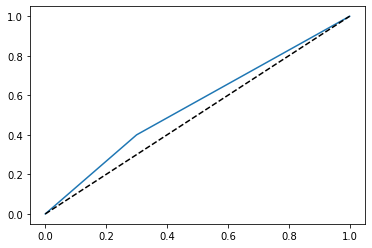

In [66]:
# Write your code!

fpr, tpr, thersholds = roc_curve(y_true, y_pred)
print(fpr, tpr, thersholds)

plt.plot(fpr, tpr, label='ROC')

plt.plot([0,1], [0,1], 'k--', label='Random')

### Log Loss

Log Loss는 이진 분류 모델을 측정하는 좋은 방법 중 하나이며, 로지스틱 회귀 및 신경망의 최적화 대상이기도 합니다. <br>

Binary Log Loss의 공식은 다음과 같이 정의되며, p는 1을 예측할 확률을 나타냅니다. 
$$ log-loss = -\frac{1}{n}\sum_{i=1}^{n}\log{p_{i}}+(1-y_{i})\log{(1-p_{i})} $$ 

분류 모델의 결과가 예측 확률인 경우 Log Loss는 실제값과 얼마나 다른지에 따른 예측의 불확실성을 고려합니다. 이를 이용하여 모델의 성능을 향상시켜 볼 수 있습니다. 일반적으로 Log Loss를 최소화하면 분류 모델의 Accuracy가 높아집니다. <br>

사이킷런은 Log Loss를 구하는 **log_loss()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [68]:
# Write your code!

from sklearn.metrics import log_loss

log_loss(y_true, y_pred)

15.542569317324336

## 2) 측정 공식 - 회귀 모델

이번에는 회귀 모델의 성능을 평가하는 방법에 대해 알아보겠습니다. <br>

수치(Float) 값을 예측하는 모델은 정확도 등의 분류 모델 평가 기준으로 평가하는 것이 애매합니다. 분류 모델은 맞게 분류했는지/아닌지만 평가하면 되지만, 회귀 모델은 정확하게 예측하지 못했더라도, 정답과 비슷하게 맞추면 성능이 좋다고 평가해야 합니다. 따라서 회귀의 평가를 위한 지표는 실제값과 예측값의 차이를 기반으로 합니다. <br>

이때 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄됩니다. 이 때문에 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구합니다. 일반적으로 회귀의 성능을 평가하는 지표로는 **MAE**, **MSE**, **RMSE**, **R^2**, **MSLE**, **RMSLE** 등이 있습니다. 

우선, 회귀 모델에 대한 측정 공식을 알아보기 위한 예제 데이터셋을 랜덤으로 생성합니다

In [71]:
import numpy as np
import pandas as pd

# 코드를 실행할 때마다 랜덤으로 값이 만들어지기 때문에 결과를 고정하기 위해 seed를 고정합니다.
np.random.seed = 123

# np.random.randint()는 최솟값(low), 최대값(high), 개수(size)를 입력받습니다. 
# 최솟값과 최댓값 사이에서 지정한 개수만큼 랜덤하게 정수(Integer)를 추출합니다.
y_true = np.random.randint(low=10, high=900, size=500)

# np.random.random()는 개수(size)를 입력받습니다.
# 구간 [0.0, 1.0)에서 지정한 개수만큼 랜덤하게 Floats를 추출합니다.
y_pred = y_true + np.round(np.random.random(500), decimals=1) * np.random.randint(low=-10, high=10, size=500)
# 실습을 위해 pred에 일부러 노이즈를 준다...

# y_true와 y_pred의 shape를 확인합니다.
# 500개가 잘 뽑혔다면 (500, 1) 또는 (500, )이 출력됩니다.
print(y_true.shape)
print(y_pred.shape)

# y_true와 y_pred의 값을 확인합니다.
y_df = pd.DataFrame(y_true, columns=['y_true'])
y_df['y_pred'] = y_pred
y_df[y_df['y_true'] > y_df['y_pred']].head(10)

(500,)
(500,)


,y_true,y_pred
0,476,475.0
1,861,859.0
3,44,42.5
4,33,25.8
5,687,683.8
7,834,831.2
9,700,697.3
16,839,838.6
18,695,692.6
19,711,702.9


### MAE (Mean Absolute Error)

MAE(Mean Absolute Error)는 실제값과 예측값의 차이를 **절댓값**으로 변환해 평균한 것입니다. 
$$ MAE = \frac{1}{n}\sum_{i=1}^{n}\left|Y_{i}-\hat{Y}_{i}\right| $$

MAE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [74]:
# Write your code!

mae_1 = abs(y_pred - y_true).mean()
mae_1

2.6416000000000013

사이킷런은 MAE를 계산하는 **mean_absolute_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다. 

In [75]:
# Write your code!

from sklearn.metrics import mean_absolute_error

mae_2 = mean_absolute_error(y_true, y_pred)
mae_2

2.6416000000000013

### MSE (Mean Squared Error)

MSE(Mean Squared Error)는 실제값과 예측값의 차이를 **제곱**해 평균한 것입니다. 
$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2 $$

MSE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [76]:
# Write your code!

mse_1 = ((y_true - y_pred) ** 2).mean()
mse_1

12.380040000000008

사이킷런은 MSE를 계산하는 **mean_squared_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [77]:
# Write your code!

from sklearn.metrics import mean_squared_error

mse_2 = mean_squared_error(y_true, y_pred)
mse_2

12.380040000000008

### RMSE (Root Mean Squared Error)

RMSE(Root Mean Squared Error)는 MSE가 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 **루트**를 씌운 것입니다.
$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2} $$

사이킷런은 RMSE를 제공하지 않으므로 RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 합니다. 

In [78]:
# Write your code!

rmse = np.sqrt(mse_1)
rmse

3.5185281013514738

### MSLE (Mean Squared Logarithmic Error)

MSLE(Mean Squared Logarithmic Error)는 실제값에 로그를 취한 값과 예측값에 로그를 취한 값의 차이를 **제곱**해 평균한 것입니다. 

$$ MSLE = \frac{1}{n}\sum_{i=1}^{n}(\log{(p_{i}+1)}-\log{(a_{i}+1)})^2 $$

MSLE를 구하는 기능은 다음과 같이 구현할 수 있습니다. 

In [79]:
# Write your code!

msle_1 = ((np.log1p(y_pred) - np.log1p(y_true)) ** 2).mean()  # log1p : log안에 위의 수식처럼 1을 더해주는 함수
# 제곱을 하기 때문에 y_pred와 y_true의 순서는 상관없다.
msle_1

0.0013580771418014626

사이킷런은 MSLE를 계산하는 **mean_squared_log_error()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [80]:
# Write your code!

from sklearn.metrics import mean_squared_log_error

msle_2 = mean_squared_log_error(y_true, y_pred)
msle_2

0.0013580771418014626

### RMSLE (Root Mean Squared Logarithmic Error)

RMSLE(Root Mean Squared Logarithmic Error)는 MSLE가 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSLE에 **루트**를 씌운 것입니다.

$$ RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log{(p_{i}+1)}-\log{(a_{i}+1)})^2} $$

사이킷런은 RMSLE를 제공하지 않으므로 RMSLE를 구하기 위해서는 MSLE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 합니다. 

In [81]:
# Write your code!

rmsle = np.sqrt(msle_1)
rmsle

0.03685209820080076

### R^2

R^2는 분산 기반으로 예측 성능을 평가합니다. 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높습니다. 

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(Y_{i}-\hat{Y}_{i})^2}{\sum_{i=1}^{n}(Y_{i}-\bar{Y})^2} $$

R^2를 구하는 기능은 다음과 같이 구현할 수 있습니다.

In [88]:
# Write your code!

ssres = sum((y_true - y_pred) ** 2)
sstot = sum((y_true - y_true.mean()) ** 2)

r2_1 = 1 - ssres / sstot
r2_1

0.999826079350889

사이킷런은 R^2를 계산하는 **r2_score()** 함수를 제공합니다. 첫 번째 파라미터로 실제값을, 두 번째 파라미터로 예측값을 입력하면 됩니다.

In [89]:
# Write your code!

from sklearn.metrics import r2_score

r2_2 = r2_score(y_true, y_pred)
r2_2

0.999826079350889

### MAPE (Mean Absolute Percentage Error)

MAE(Mean Absolute Percentage Error)는 Scale Dependent Error의 단점을 커버하는 지표입니다. MAPE의 공식은 아래와 같습니다. 
$$ MAPE = \frac{100}{n}\sum_{i=1}^{n}\left|\frac{Y_{i}-\hat{Y}_{i}}{Y_{i}}\right| $$

MAPE는 예측값과 실제값의 차이를 실제값으로 나눈 값의 절댓값을 평균한 후 100을 곱하여 백분율로 표현합니다. 

In [91]:
# Write your code!

mape = abs((y_true - y_pred) / y_true).mean() * 100
mape

1.469947624154919